### Homework For Lecture 9

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn import metrics

In [71]:
# 2. Import the dataset
df = pd.read_csv('cancer.csv')

In [3]:
# 3. Exploratory data analysis: Data Information
print(df.head())
print(df.shape)
print(df.info())

        Id  Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
0  1000025                5                     1                      1   
1  1002945                5                     4                      4   
2  1015425                3                     1                      1   
3  1016277                6                     8                      8   
4  1017023                4                     1                      1   

   Marginal_Adhesion  Single_Epithelial_Cell_Size Bare_Nuclei  \
0                  1                            2           1   
1                  5                            7          10   
2                  1                            2           2   
3                  1                            3           4   
4                  3                            2           1   

   Bland_Chromatin  Normal_Nucleoli  Mitoses  Class  
0                3                1        1      2  
1                3                2        1

In [4]:
# 3. Exploratory data analysis: Class Inbalance?
print(df['Class'].value_counts())
print()
print(df['Class'].value_counts()/np.float64(len(df)))

2    458
4    241
Name: Class, dtype: int64

2    0.655222
4    0.344778
Name: Class, dtype: float64


In [46]:
# 3. Exploratory data analysis: Missing Data?
print(df.isnull().sum())

Id                             0
Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


In [74]:
#오브젝트 타입 결측치 확인
df.Bare_Nuclei.unique()

array(['1', '10', '2', '4', '3', '9', '7', '?', '5', '8', '6'],
      dtype=object)

In [75]:
len(df.loc[df['Bare_Nuclei'] == '?'])

16

In [76]:
df['Bare_Nuclei'] = df['Bare_Nuclei'].replace('?', np.nan)
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce').astype('Int64')

In [77]:
df.Bare_Nuclei.unique()

<IntegerArray>
[1, 10, 2, 4, 3, 9, 7, <NA>, 5, 8, 6]
Length: 11, dtype: Int64

In [79]:
df.dropna(inplace=True)

In [80]:
print(df.isnull().sum())

Id                             0
Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


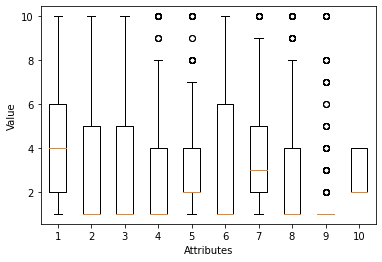

In [81]:
data_to_boxplot = df.iloc[:, 1:]
plt.boxplot(data_to_boxplot)
plt.xlabel('Attributes')
plt.ylabel('Value')
plt.show()

In [93]:
# 4. Split data into separate training and test set
training_points = df.drop(columns=['Class'])
training_labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.3, 
	random_state=4)

In [94]:
# 5. Fit K Neighbours Classifier to the training set
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)

[2 4 2 4 2 2 2 2 4 2 2 4 4 4 4 2 2 2 2 2 4 2 4 4 4 4 2 2 4 4 4 2 4 2 2 2 4
 2 2 2 2 2 2 4 4 2 2 2 2 4 2 2 2 2 2 2 4 2 2 2 2 4 4 2 4 4 4 2 2 2 4 4 2 2
 2 4 2 2 4 4 2 2 2 2 4 4 2 4 2 2 2 4 2 2 2 4 2 2 2 4 2 4 2 2 4 2 4 2 2 4 2
 2 4 2 2 2 2 2 4 4 4 4 4 2 2 4 2 2 4 2 4 2 2 2 2 2 4 4 2 2 4 4 2 2 2 2 4 4
 2 4 2 2 4 4 4 4 2 2 4 2 2 2 4 2 4 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 2 4 4 4
 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4]


In [84]:
# 6. Check Accuracy Score
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[[104  28]
 [ 54  19]]
0.6


[0.6292682926829268, 0.6195121951219512, 0.5804878048780487, 0.6146341463414634, 0.6, 0.5951219512195122, 0.6, 0.624390243902439, 0.6390243902439025, 0.6487804878048781, 0.6439024390243903, 0.6487804878048781, 0.624390243902439, 0.6439024390243903, 0.6097560975609756, 0.6487804878048781, 0.6487804878048781, 0.6487804878048781, 0.6487804878048781, 0.6585365853658537, 0.6341463414634146, 0.6146341463414634, 0.5951219512195122, 0.6097560975609756, 0.5951219512195122, 0.6048780487804878, 0.5804878048780487, 0.5902439024390244, 0.5756097560975609, 0.5658536585365853, 0.5560975609756098, 0.5951219512195122, 0.5853658536585366, 0.6048780487804878, 0.6, 0.6390243902439025, 0.6, 0.6487804878048781, 0.6195121951219512, 0.6390243902439025, 0.6341463414634146, 0.6439024390243903, 0.6439024390243903, 0.6487804878048781, 0.6536585365853659, 0.6487804878048781, 0.6487804878048781, 0.6487804878048781, 0.6487804878048781]


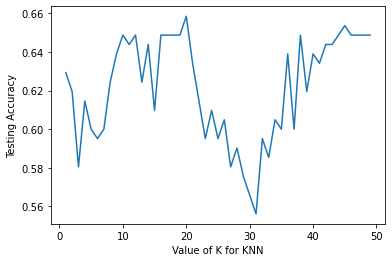

In [85]:
# 7. Improving Accuracy: Tuning k parameter 
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

[0.6097560975609756, 0.6487804878048781, 0.6487804878048781, 0.6487804878048781, 0.6487804878048781, 0.6585365853658537, 0.6341463414634146, 0.6146341463414634, 0.5951219512195122, 0.6097560975609756, 0.5951219512195122, 0.6048780487804878, 0.5804878048780487, 0.5902439024390244, 0.5756097560975609]


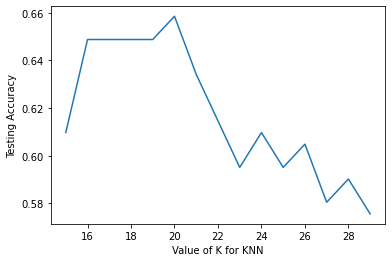

In [86]:
# 7. Improving Accuracy: Tuning k parameter 
k_range = range(15, 30)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [87]:
# 7. Rebuild kNN Classification model using different values of k 
classifier = KNeighborsClassifier(n_neighbors = 21)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[2 2 2 4 2 2 2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 2 4 2 2 2 2 2 2 2 2 2 4 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 4 4 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4
 2 2 2 2 2 2 4 2 2 2 4 2 2 2 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 2 4 2 2 4 2 4
 2 2 4 2 2 2 2 2 4 4 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 2 2 4 4 2 2 2
 2 2 2 2 2 2 2 4 2 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2 2 4 2 2 4 2 2 2 4 2 2
 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 2 4 4 4 2]
[[114  18]
 [ 57  16]]
0.6341463414634146


<AxesSubplot:>

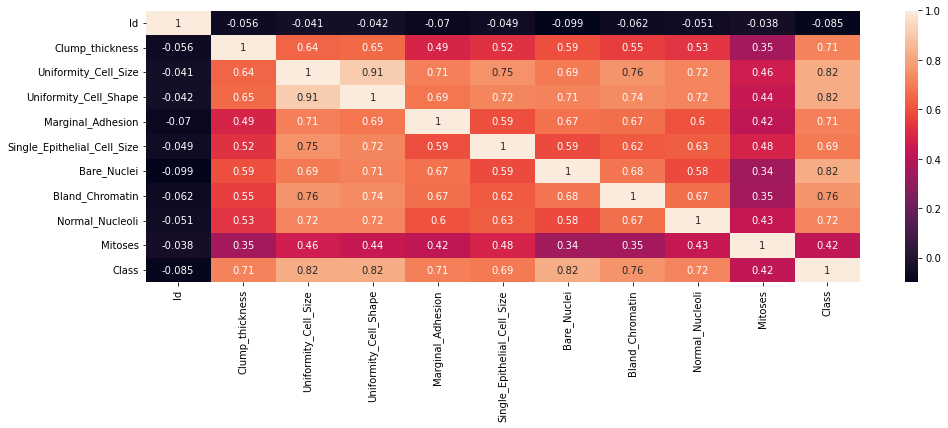

In [88]:
# 9. Improving Accuracy: Feature Engineering

dfcorr = df.corr()
plt.figure(figsize=(16,5))
sns.heatmap(data = dfcorr, annot=True)

In [89]:
df.drop(columns='Id', inplace=True)

In [91]:
df.describe()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


[0.9512195121951219, 0.9463414634146341, 0.9609756097560975, 0.9560975609756097, 0.9512195121951219, 0.9560975609756097, 0.9512195121951219, 0.9463414634146341, 0.9414634146341463, 0.9463414634146341, 0.9463414634146341, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9463414634146341, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9560975609756097, 0.9560975609756097, 0.9560975609756097, 0.9512195121951219, 0.9560975609756097, 0.9560975609756097, 0.9560975609756097, 0.9560975609756097, 0.9560975609756097, 0.9560975609756097, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219]


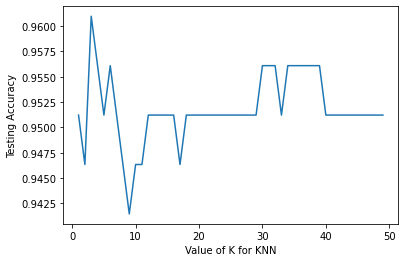

In [95]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

[0.9512195121951219, 0.9463414634146341, 0.9609756097560975, 0.9560975609756097, 0.9512195121951219, 0.9560975609756097, 0.9512195121951219, 0.9463414634146341, 0.9414634146341463]


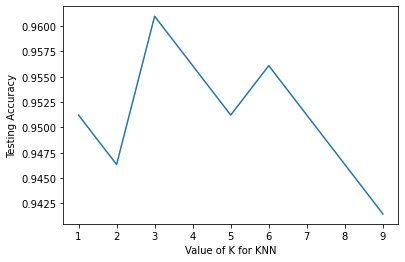

In [99]:
k_range = range(1, 10)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [101]:
# 7. Rebuild kNN Classification model using different values of k 
classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)
guesses = classifier.predict(X_test)

print(guesses)
print(confusion_matrix(y_test, guesses))
print(metrics.accuracy_score(y_test, guesses))

[2 4 2 4 2 2 2 2 4 2 2 4 4 4 4 2 2 2 2 2 4 2 4 4 2 4 2 2 4 4 4 2 4 2 2 2 4
 2 2 2 2 2 2 4 4 2 2 2 2 4 2 2 2 2 2 2 4 2 2 2 2 4 4 2 4 4 4 2 2 2 4 4 2 2
 2 4 2 2 4 4 2 2 2 2 4 4 2 4 2 2 2 4 2 2 2 4 2 2 2 4 2 4 2 2 4 2 4 2 2 4 2
 2 4 2 2 2 2 2 4 4 4 4 4 2 2 4 2 2 4 2 4 2 2 2 2 2 4 4 2 2 4 4 2 2 2 2 4 4
 2 4 2 2 4 4 4 4 2 2 4 2 2 2 4 2 4 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 2 4 4 4
 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 4]
[[126   6]
 [  2  71]]
0.9609756097560975


<AxesSubplot:>

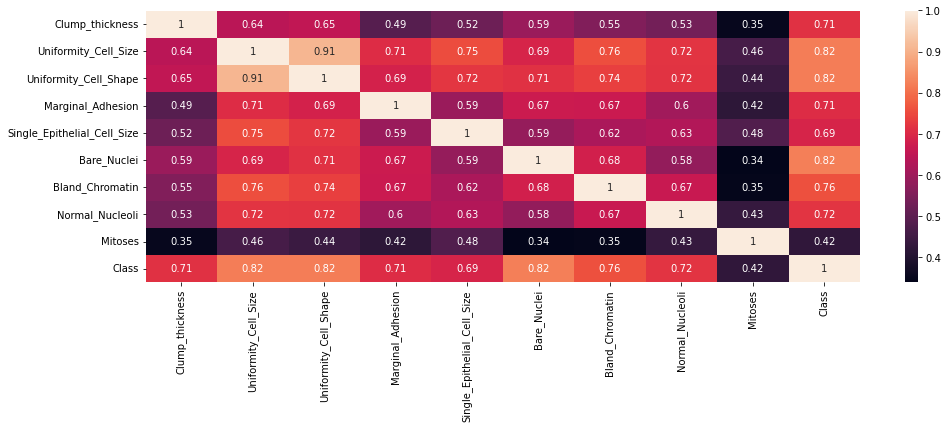

In [102]:
dfcorr = df.corr()
plt.figure(figsize=(16,5))
sns.heatmap(data = dfcorr, annot=True)

In [103]:
df.drop(columns='Mitoses', inplace=True)

[0.9512195121951219, 0.9463414634146341, 0.9609756097560975, 0.9560975609756097, 0.9512195121951219, 0.9560975609756097, 0.9512195121951219, 0.9463414634146341, 0.9414634146341463, 0.9463414634146341, 0.9463414634146341, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9463414634146341, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9560975609756097, 0.9560975609756097, 0.9560975609756097, 0.9512195121951219, 0.9560975609756097, 0.9560975609756097, 0.9560975609756097, 0.9560975609756097, 0.9560975609756097, 0.9560975609756097, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219, 0.9512195121951219]


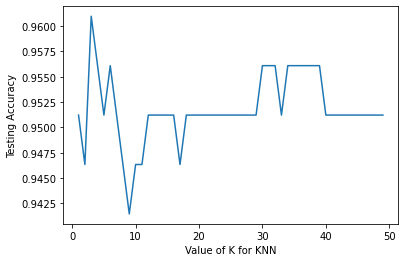

In [104]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()

In [105]:
df.describe()

,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


정규화 불필요라고 판단

In [108]:
# range 바꿔보기
training_points = df.drop(columns=['Class'])
training_labels = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
	training_points, 
	training_labels, 
	test_size=0.2, 
	random_state=4)

[0.9781021897810219, 0.9635036496350365, 0.9708029197080292, 0.9708029197080292, 0.9708029197080292, 0.9781021897810219, 0.9708029197080292, 0.9781021897810219, 0.9635036496350365, 0.9708029197080292, 0.9635036496350365, 0.9635036496350365, 0.9635036496350365, 0.9708029197080292, 0.9635036496350365, 0.9708029197080292, 0.9635036496350365, 0.9781021897810219, 0.9708029197080292, 0.9781021897810219, 0.9781021897810219, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9854014598540146, 0.9781021897810219, 0.9781021897810219, 0.9781021897810219, 0.9781021897810219, 0.9781021897810219, 0.9781021897810219]


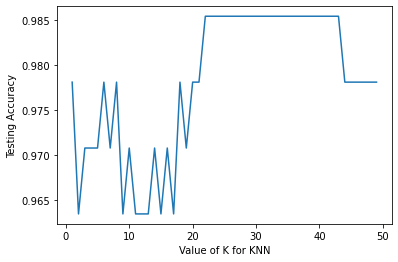

In [109]:
k_range = range(1, 50)

accuracy_scores = []

for k in k_range:
    classifier = KNeighborsClassifier(n_neighbors = k)
    classifier.fit(X_train, y_train)
    guesses = classifier.predict(X_test)
    accuracy_scores.append(metrics.accuracy_score(y_test, guesses))
print(accuracy_scores)

plt.plot(k_range, accuracy_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.show()